## Classification

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
cancer = load_breast_cancer()

In [7]:
#Look at Cancer data
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
#Feature Names
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
#Target variable
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target, stratify = cancer.target,
                                                   random_state = 42)

In [11]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on Training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on Training set: 1.000
Accuracy on Test set: 0.937


In [24]:
# Slightly overfit model because we didn't do any pre-pruning.
# Try adjusting a parameter to control overfitting

dtree = DecisionTreeClassifier(max_depth = 2, random_state = 0)
dtree.fit(X_train, y_train)

print("Accuracy on Training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on Training set: 0.958
Accuracy on Test set: 0.909


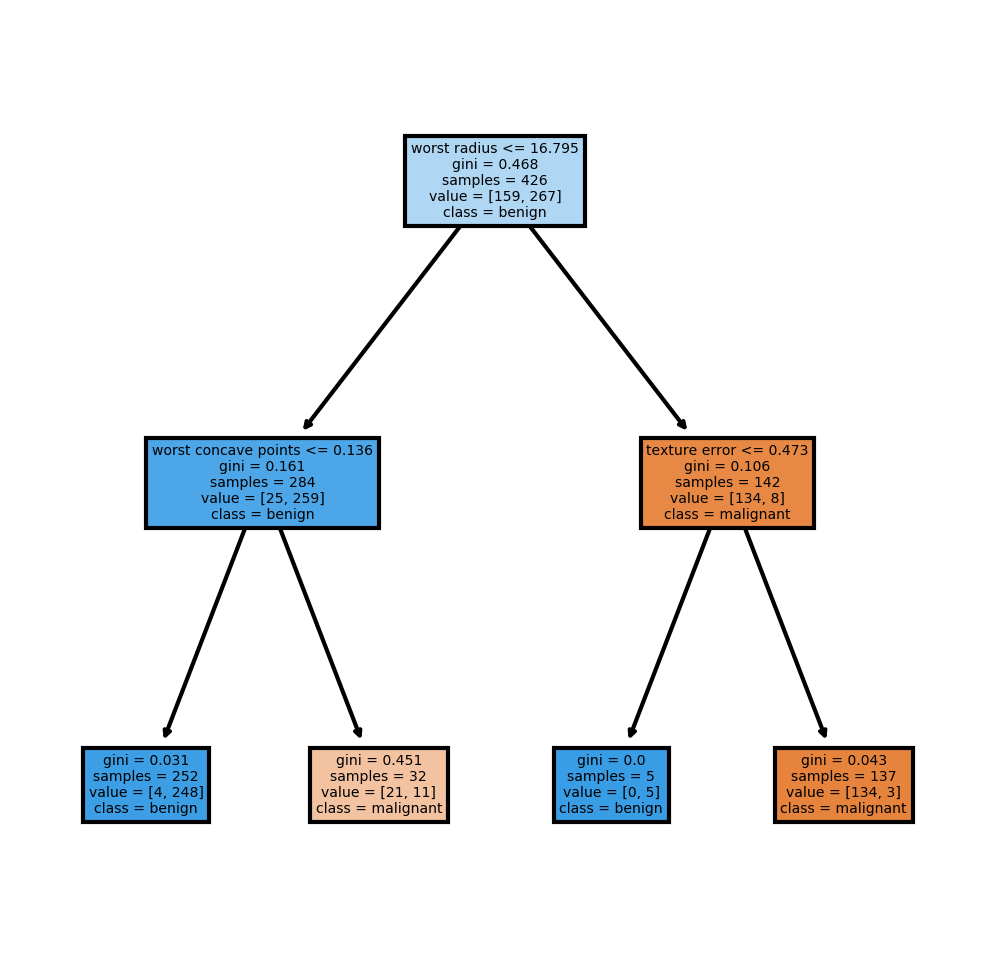

In [25]:
# Visualize the tree
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4), dpi = 300)

tree.plot_tree(dtree,
              feature_names = cancer.feature_names,
              class_names = ['malignant', 'benign'],
              filled = True);


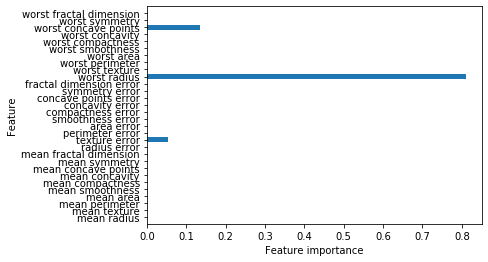

In [35]:
# Feature Importances
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtree)

---

## Regression

In [36]:
link = 'https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/master/data/ram_price.csv'

df = pd.read_csv(link)

df.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [37]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


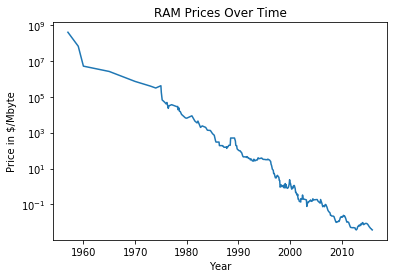

In [38]:
plt.semilogy(df['date'], df['price'])
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')
plt.title('RAM Prices Over Time');

In [39]:
df_train = df[df.date < 2000]
df_test = df[df.date >= 2000]

In [41]:
# Predict prices based on the date
X_train = df_train.date[:, np.newaxis]
# Log transformation gives simpler relationship of data to target
y_train = np.log(df_train.price)

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [43]:
tree_reg = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [44]:
# Make predictions based on all data

X_all = df.date[:, np.newaxis]

pred_tree_reg = tree_reg.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [45]:
price_tree = np.exp(pred_tree_reg)
price_lr = np.exp(pred_lr)

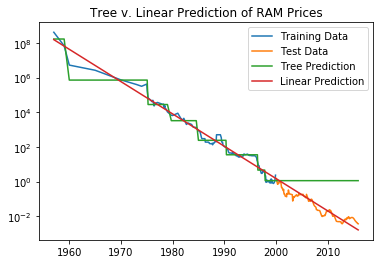

In [47]:
plt.semilogy(df_train.date, df_train.price, label = 'Training Data')
plt.semilogy(df_test.date, df_test.price, label = 'Test Data')
plt.semilogy(df.date, price_tree, label = 'Tree Prediction')
plt.semilogy(df.date, price_lr, label = 'Linear Prediction')
plt.title("Tree v. Linear Prediction of RAM Prices")
plt.legend();

In [4]:
salaries = pd.read_csv('salaries.csv')

salaries.head()

,experience,salary
0,6,122207
1,4,74273
2,1,61591
3,0,84507
4,5,80073


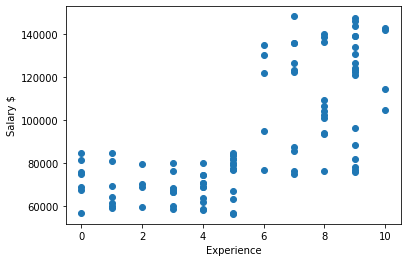

In [5]:
plt.scatter(salaries['experience'], salaries['salary'])
plt.xlabel('Experience')
plt.ylabel('Salary $');

In [21]:
X = salaries['experience']
# Have to reshape the data
X = np.array(X).reshape(-1, 1)
y = salaries['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [23]:
tree_reg = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [25]:
pred_tree_reg = tree_reg.predict(X_test)
pred_lr = linear_reg.predict(X_test)

In [27]:
print("Tree Model Accuracy on Training set: {:.3f}".format(tree_reg.score(X_train, y_train)))
print("Tree Model Accuracy on Test set: {:.3f}".format(tree_reg.score(X_test, y_test)))

Tree Model Accuracy on Training set: 0.654
Tree Model Accuracy on Test set: 0.401


In [28]:
print("Linear Model Accuracy on Training set: {:.3f}".format(linear_reg.score(X_train, y_train)))
print("Linear Model Accuracy on Test set: {:.3f}".format(linear_reg.score(X_test, y_test)))

Linear Model Accuracy on Training set: 0.524
Linear Model Accuracy on Test set: 0.365
